分类问题的评价指标：accuracy准确度

回归问题的评价标准  
标价所使用的标准（对）可以和最优化时的目标函数不一致的

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 只取RM属性
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
x = boston.data[:, 5]

In [7]:
x.shape

(506,)

In [8]:
y = boston.target

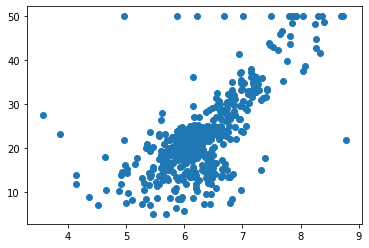

In [9]:
plt.scatter(x, y)

In [10]:
np.max(y)

50.0

In [13]:
x = x[y<50]  #fancy index 只取数组中满足条件的元素
y = y[y<50]

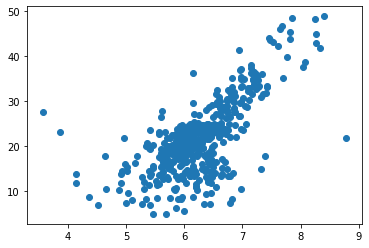

In [14]:
plt.scatter(x, y)

In [15]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed = 666)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [17]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegreesion2()

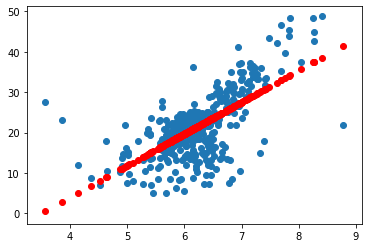

In [27]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, reg.predict(x_train), color = 'r')
#plt.scatter(x_train, reg.predict(x_train), color = 'r')

In [22]:
y_predict = reg.predict(x_test)

### MSE

In [24]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [26]:
from math import sqrt

rmst_test = sqrt(mse_test)
rmst_test

4.914936635846635

### MAE

In [29]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

### 使用自己编写的评价标准

In [31]:
from playML.metrics import mean_absolute_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_squared_error

In [32]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### 使用sklearn中的评价标准

In [38]:
# sklearn没有实现rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error([100, 100], [0, 0])
mean_squared_error([100, 100], [0, 0])

print(sqrt(mean_squared_error([100, 100], [0, 0])), mean_absolute_error([100, 100], [0, 0]))

100.0 100.0


RMSE vs MAE
相同：量纲一样
不同：RMSE会比MAE大一些,RMSE有放大预测值和真实值之间的*距离较大*的数值的趋势，所以比较起来会使用RMSE作为评价标准，因为如果RMSE小，说明结果中最大的误差也小。

训练过程中使用最小二乘法而不使用绝对值，其实也是想使得预测结果最大的那个误差，所对应的数值，尽量小